In [1]:
import functions as fc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2 as cv

In [2]:
A = fc.record_data(10)

In [2]:
IMG=np.zeros((1000,1000))
cv.circle(IMG,(500,500),500,(255,255,0),1)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

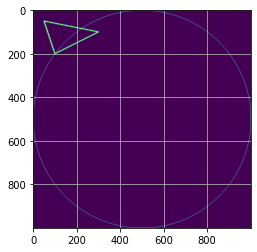

In [5]:
plt.grid()
p1 = (100, 200)
p2 = (50, 50)
p3 = (300, 100)
cv.line(IMG, p1, p2, (255, 0, 0), 3)
cv.line(IMG, p2, p3, (255, 0, 0), 3)
cv.line(IMG, p1, p3, (255, 0, 0), 3)
plt.imshow(IMG,cmap='viridis')

In [71]:
cv.rectangle?

Docstring:
rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]]) -> img
.   @brief Draws a simple, thick, or filled up-right rectangle.
.   
.   The function cv::rectangle draws a rectangle outline or a filled rectangle whose two opposite corners
.   are pt1 and pt2.
.   
.   @param img Image.
.   @param pt1 Vertex of the rectangle.
.   @param pt2 Vertex of the rectangle opposite to pt1 .
.   @param color Rectangle color or brightness (grayscale image).
.   @param thickness Thickness of lines that make up the rectangle. Negative values, like #FILLED,
.   mean that the function has to draw a filled rectangle.
.   @param lineType Type of the line. See #LineTypes
.   @param shift Number of fractional bits in the point coordinates.



rectangle(img, rec, color[, thickness[, lineType[, shift]]]) -> img
.   @overload
.   
.   use `rec` parameter as alternative specification of the drawn rectangle: `r.tl() and
.   r.br()-Point(1,1)` are opposite corners
Type:      builtin_function

In [1]:
a=b=5

In [2]:
a

5

In [3]:
b

5

In [1]:
import functions as fc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2 as cv

x: 200
y: 0


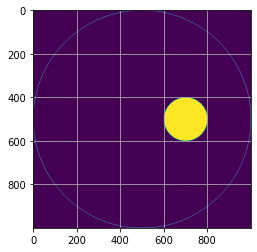

In [6]:
img = fc.gen_ground_truth_pic('circle',200,np.pi*4)
plt.grid()

plt.imshow(img,cmap='viridis')

In [2]:
round(250*np.sin(np.pi/2))

250

In [4]:
cv.rectangle?

Docstring:
rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]]) -> img
.   @brief Draws a simple, thick, or filled up-right rectangle.
.   
.   The function cv::rectangle draws a rectangle outline or a filled rectangle whose two opposite corners
.   are pt1 and pt2.
.   
.   @param img Image.
.   @param pt1 Vertex of the rectangle.
.   @param pt2 Vertex of the rectangle opposite to pt1 .
.   @param color Rectangle color or brightness (grayscale image).
.   @param thickness Thickness of lines that make up the rectangle. Negative values, like #FILLED,
.   mean that the function has to draw a filled rectangle.
.   @param lineType Type of the line. See #LineTypes
.   @param shift Number of fractional bits in the point coordinates.



rectangle(img, rec, color[, thickness[, lineType[, shift]]]) -> img
.   @overload
.   
.   use `rec` parameter as alternative specification of the drawn rectangle: `r.tl() and
.   r.br()-Point(1,1)` are opposite corners
Type:      builtin_function